##  Aula 01

Vamos utilizar diversas funcionalidades desta biblioteca para explorar dados de de anúncio de imóveis da cidade de São Paulo. Começaremos a nossa análise de dados entendendo características gerais dos nossos dados e olhando mais no detalhe para os bairros que tem imóveis a venda.

### Importanto as bibliotecas

In [183]:
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
pd.set_option('display.max.rows', None)

### Base de dados

In [106]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dataset = pd.read_csv(url)
dataset.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [107]:
dataset.sample() #trás um registro random

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5241,NaN,Santo Amaro,São Paulo,755,4,5,4,R$ 7.300.000


### Entendendo os dados que vamos trabalhar

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


**Total de Registros:** 10008

**Colunas:** 8

! **Colunas que talvez eu tenha que alterar:**
    - Valor: Separar a coluna Valor em - Valor e Moeda

In [109]:
dataset.dtypes

Rua          object
Bairro       object
Cidade       object
Metragem      int64
Quartos       int64
Banheiros     int64
Vagas         int64
Valor        object
dtype: object

In [110]:
dataset["Bairro"][6522] #pesquisando o bairo com umm ID específico 

'Vila Paulo Silas'

#### Média Metragem dos apartamentos na vila mariana

In [111]:
imoveis_vila_mariana = (dataset["Bairro"] == "Vila Mariana")
imoveis_vila_mariana= dataset[imoveis_vila_mariana]

In [112]:
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

#### Quantos bairros temos no dataset e quantas vezes eles aparecem?

In [113]:
n_imoveis_bairro = dataset["Bairro"].value_counts()
n_imoveis_bairro

Alto de Pinheiros                        409
Jardim Guedala                           403
Jardim Paulista                          309
Brooklin Paulista                        247
Jardim Europa                            240
Cidade Jardim                            230
Vila Madalena                            224
Pacaembu                                 222
Planalto Paulista                        195
Jardim Leonor                            186
Vila Mariana                             184
Morumbi                                  175
Jardim América                           169
Jardim Paulistano                        162
Santo Amaro                              161
Sumaré                                   153
Campo Belo                               146
Bosque da Saúde                          135
Boaçava                                  115
Jardim da Glória                         114
Indianópolis                             112
Vila Nova Conceição                      107
Pinheiros 

Mostrar os 10 bairros com mais imóveis

<AxesSubplot:>

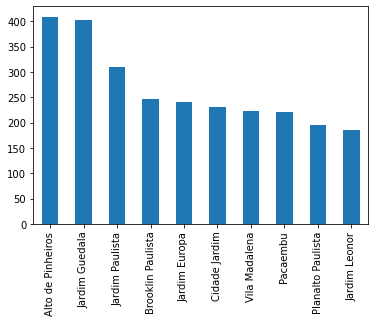

In [114]:
n_imoveis_bairro.head(10).plot.bar()

### 1 - Realizar a média da metragem por bairro

<AxesSubplot:xlabel='Bairro'>

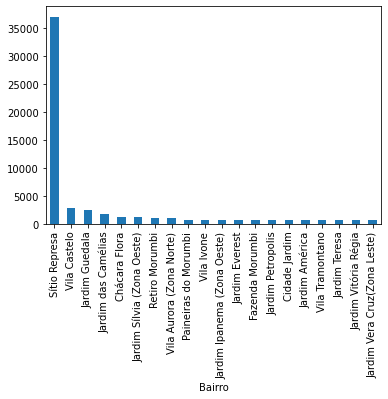

In [115]:

bairro_media_metragem = dataset.groupby(["Bairro"])["Metragem"].mean().round().sort_values(ascending = False)
bairro_media_metragem.head(20).plot.bar()

In [116]:
#confirmando esse valor superior do Sitio Represa
confirmando = (dataset["Bairro"] == "Sítio Represa")
confirmando = dataset[confirmando]
confirmando["Metragem"].mean()

37000.0

### 2 - Buscar duas formas de selecionar os dados por bairro

##### Primeira forma 
Utilizando query

In [117]:
dataset.query('Bairro == "Jardim Paulista"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
68,Rua General Fonseca Teles,Jardim Paulista,São Paulo,420,4,6,3,R$ 8.700.000
98,Rua Marechal Bitencourt,Jardim Paulista,São Paulo,360,4,5,4,R$ 1.800.000
108,NaN,Jardim Paulista,São Paulo,1060,5,5,4,R$ 30.000.000
112,Rua José Clemente,Jardim Paulista,São Paulo,724,4,6,3,R$ 8.000.000
134,Rua José Clemente,Jardim Paulista,São Paulo,700,4,5,4,R$ 7.900.000
172,Rua Pamplona,Jardim Paulista,São Paulo,156,4,4,2,R$ 2.340.000
175,Rua Maestro Elias Lobo,Jardim Paulista,São Paulo,542,5,8,4,R$ 25.000\n /Mês
255,Rua Maestro Elias Lobo,Jardim Paulista,São Paulo,191,3,4,1,R$ 2.590.000
384,Alameda Casa Branca,Jardim Paulista,São Paulo,180,2,1,2,R$ 2.100.000
385,Rua General Fonseca Teles,Jardim Paulista,São Paulo,425,4,6,3,R$ 8.700.000


##### Segunda Forma 
Utilizando o dataframe

In [118]:
pd.DataFrame(dataset, columns=["Bairro"])
                  

,Bairro
0,Planalto Paulista
1,Jardim dos Estados
2,Jardim Reimberg
3,Jardim Morumbi
4,Mooca
5,Santo Amaro
6,Cidade Mãe do Céu
7,Jardim Vergueiro
8,Jardim Benfica
9,Vila Alpina


### 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas no DF (colocando alguma conclusão).

In [124]:
#Olhando os dados
dataset.head()
#Média de Valores por Bairro 
#Relação da média de valores com o numero de quartos 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,valor_Imovel,tipo_Contrato
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


#### Dividindo a coluna Valor

In [126]:
dataset['Valor'].str.split(expand = True)[0].unique()
dataset['Valor'].str.split(expand = True)[1].unique()
dataset['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [120]:
dataset[['Moeda', 'valor_Imovel', 'tipo_Contrato']] = dataset['Valor'].str.split(expand=True)

0         7.000.000
1         3.700.000
2           380.000
3           685.000
4           540.000
5         1.980.000
6           850.000
7           450.000
8           199.900
9           585.000
10          700.000
11           15.000
12        2.500.000
13        1.700.000
14        1.150.000
15          550.000
16          420.000
17        2.232.000
18        2.700.000
19        4.190.000
20          860.000
21          650.000
22          490.000
23        1.485.000
24          650.000
25          550.000
26        1.100.000
27        2.985.000
28        1.700.000
29        3.100.000
30        8.700.000
31          849.000
32          890.000
33          550.000
34        1.650.000
35          445.000
36          425.000
37          500.000
38        1.060.000
39        3.890.000
40        2.200.000
41        1.250.000
42        1.250.000
43        2.200.000
44          390.000
45          650.000
46        1.600.000
47          370.000
48          130.000
49          545.000


In [134]:
dataset['valor_Imovel']  =  [re.sub('[^A-Za-z0-9]+', '', str(x)) for x in dataset['valor_Imovel']]
dataset['valor_Imovel'] = dataset['valor_Imovel'].astype('float64')

#### Média do Valor por Bairro

In [171]:
bairro_media_valor = dataset.groupby(["Bairro"])["valor_Imovel"].mean().round().sort_values(ascending = False)

<AxesSubplot:xlabel='Bairro'>

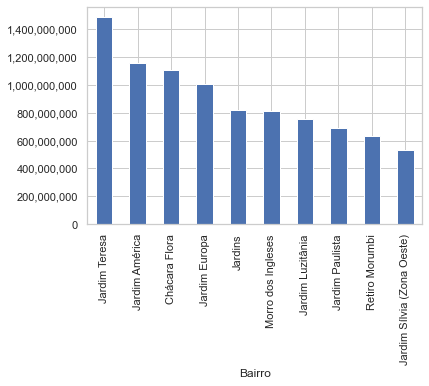

In [170]:
ax = bairro_media_valor.head(10).plot(kind='bar')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax

Verificamos que os Bairros com a média de imóveis maiores são: Jardim Teresa, Jardim América e Chácara Flora. 
Tendo uma diferença maior entre o primeiro e segundo lugar.

#### Relação entre as Variáveis numéricas

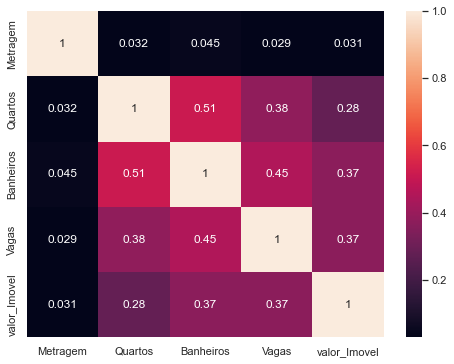

In [185]:
dt_corr = dataset.corr(method ='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(dt_corr, annot=True)
plt.show()

Verificando pelo gráfico, vemos que o valor do imóvel tem uma correlação maior com o numero de banheiros e de vagas.
Após realizar a limpeza conseguimos ver essas correlações com o Bairro também, então vamos ter correlações mais completas

### 4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max).

Com o describe conseguimos pegar informações descritivas dos dados numéricos que estamos trabalhando

In [ ]:
dataset.describe()

,Metragem,Quartos,Banheiros,Vagas,valor_Imovel
count,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04
mean,442.300659,3.483114,3.879097,4.097222,2.794170e+08
std,7515.379389,1.064200,1.988467,2.824014,3.866249e+08
min,10.000000,1.000000,1.000000,1.000000,1.650000e+05
25%,173.000000,3.000000,2.000000,2.000000,7.500000e+07
50%,290.000000,3.000000,4.000000,4.000000,1.600000e+08
75%,460.250000,4.000000,5.000000,5.000000,3.350000e+08
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+09


### 5 - Descobrir quais são os bairros que não tem nome de rua.

Verificando as colunas com registros na\null

In [208]:
for col in dataset.columns:
    null = dataset[col].isnull().sum()
    
    print (f' A coluna {col} - Tem {null} registros null')

 A coluna Rua - Tem 3434 registros null
 A coluna Bairro - Tem 12 registros null
 A coluna Cidade - Tem 0 registros null
 A coluna Metragem - Tem 0 registros null
 A coluna Quartos - Tem 0 registros null
 A coluna Banheiros - Tem 0 registros null
 A coluna Vagas - Tem 0 registros null
 A coluna Valor - Tem 0 registros null
 A coluna Moeda - Tem 0 registros null
 A coluna valor_Imovel - Tem 0 registros null
 A coluna tipo_Contrato - Tem 9156 registros null


In [220]:
ruas_na = dataset[dataset['Rua'].isna()]
ruas_x_bairro = ruas_na['Bairro'].value_counts().sort_values(ascending = False)
ruas_x_bairro

Jardim Guedala                        190
Alto de Pinheiros                     169
Jardim Paulista                       138
Jardim Europa                         128
Jardim Leonor                         118
Cidade Jardim                         115
Morumbi                                89
Jardim América                         88
Vila Madalena                          83
Brooklin Paulista                      75
Santo Amaro                            66
Pacaembu                               63
Jardim Paulistano                      58
Bosque da Saúde                        55
Boaçava                                51
Sumaré                                 50
Vila Ida                               38
Planalto Paulista                      37
Campo Belo                             32
Fazenda Morumbi                        32
Pinheiros                              31
Jardim Luzitânia                       31
Vila Nova Conceição                    30
Alto da Lapa                      